# Introduction and goal

The main goal of this practical is to display the knowledge I have acquired about Natural Language Processing analysis, specifically sentiment analysis. As such, I will try to use a variety of tools learned during this module.

I will not be designing a complete Deep Learning project but rather just focus on practicing the Natural Language Processing tools that will enable be to analyze the sentiment in Amazon written reviews.

The dataset I will be using for this exercise, "reviews_Sports_and_Outdoors_5.json", is related to sports and outdoor goods.

# 1. Exploratory Data Analysis

## Connect to Google Drive, define working paths, install utility packages

In [1]:
# Mount google drive unit
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Print working directory (to check it mounted correctly)
!pwd

/content


In [3]:
# Define working path
working_path = './drive/MyDrive/KeepCoding/NLP/Project'

In [4]:
# Change the current working directory of the notebook to working_path
%cd {working_path}

/content/drive/MyDrive/KeepCoding/NLP/Project


In [5]:
# List all files in the current directory
!ls

 AHV_01_NLP.ipynb			   Images
 AHV_02_NLP_Preprocessing.ipynb		  'Práctica final NLP.pdf'
'AHV_03_NLP_Entrenamiento&Test.ipynb'	   __pycache__
'AHV_04_NLP_Métricas&Conclusiones.ipynb'   requirements.txt
 Datasets				   utils.py
 Helpful_scores.gsheet			   w2v_model.model


In [6]:
# Install needed utility packages
# !pip install gunzip
!pip install -r requirements.txt
!pip install gensim


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.1 MB/s eta 0:00:00
  Created wheel for pyDAWG: filename=pyDAWG-1.0.1-cp312-cp312-linux_x86_64.whl size=63711 sha256=ed31f8e17c741ef15104dd7ca38dbc0acf778443455d61a9585f97d2ab14557e
  Stored in directory: /root/.cache/pip/wheels/57/f0/6b/678352fda0b53b13ba0a40e91642a402c3899b0c1aea6ed07e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=08b715b652

In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
# LIBRARIES AND MODULES NEEDED IN THIS NOTEBOOK

# User-defined
import utils

# Standard libraries
import json
import re
import string
import time
import logging
import multiprocessing

# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from wordcloud import WordCloud

# NLP
import spacy
import nltk
from nltk import ngrams
from nltk.probability import FreqDist
from stop_words import get_stop_words
from collections import Counter

# Word embeddings
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

# Dimensionality reduction
from sklearn.manifold import TSNE

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

## Decompress datafile and inspect file structure

In [9]:
# Decompress entire datafile
!gunzip -c Datasets/reviews_Sports_and_Outdoors_5.json.gz > Datasets/reviews_Sports_and_Outdoors_5.json

In [10]:
# Define dataset directory path and datafile path
dataset_dir_path = './Datasets'
file_path = dataset_dir_path + '/reviews_Sports_and_Outdoors_5.json'

In [11]:
# Inspect file structure using json library

# Open and read the JSON file
with open(file_path, 'r') as file:
    first_line = file.readline()  # Read the first line
    entry = json.loads(first_line)  # Parse the JSON object
    print(entry)  # Display the parsed entry

{'reviewerID': 'AIXZKN4ACSKI', 'asin': '1881509818', 'reviewerName': 'David Briner', 'helpful': [0, 0], 'reviewText': 'This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy', 'overall': 5.0, 'summary': 'Woks very good', 'unixReviewTime': 1390694400, 'reviewTime': '01 26, 2014'}


In [12]:
# Load data into a dictionary using utils.amazon_reviews_to_dict
data_dict = utils.amazon_reviews_to_dict(file_path)

In [13]:
# Display a range of rows from the data
first_row = 165340
last_row = 165344
for i in range (first_row, last_row+1):
  print(data_dict[i])

{'overall': 5.0, 'helpful': [6, 6], 'productID': 'B002QZ1RS6', 'reviewerID': 'A2MLX078LASTU8', 'unixReviewTime': 1324684800, 'reviewDate': '12 24, 2011', 'reviewerName': 'Steve', 'summary': 'Great workout! Helped me get the six pack I always wanted!', 'reviewText': "After doing P90X for about 8 months I decided to do a P90X-Insanity hybrid because this workout looked awesome and intense. I was honestly scared to try it out at first, even after being in good shape from doing a couple of rounds of P90X. I was very sore afterwards in my legs and butt. It sucked walking to class and walking up stairs the next day. But the pain is good because you know there is room for improvement and that over time your body will get better.As for the title of the review, when doing P90X I did not get the 6 pack that I dreamed of having and I blame that on my diet. I do not follow the food guide perfectly due to the fact that I am in college and I have a small fridge, limited food shelf space, and a kitch

## Exploration of numeric fields

The dataset contains time information in two different ways:
* 'unixReviewTime': I believe this is the date the review was entered, in Unix Time (number of seconds elapsed since January 1st, 1970).
* 'reviewTime', now in the dictionary as 'reviewDate': this is the date at which the review was entered in the system, in MM DD, YYYY format.

This may be important if the age of the review turns out to be relevant for our target metric. First I will check if these two date-type fields are indeed equivalent in our dataset.

In utils.py I created two functions to easily convert from one date format to the other, and viceversa. If they turn out to be equivalent, I will just be using unixReviewTime and use this function whenever displaying dates so that it is easier to visualize.

In [14]:
# For a given entry_index, retrieves 'unixReviewTime' and
# converts it to a human readable date in format YYYY MM DD.
# The user can check if the two are indeed equivalent

entry_index = 165341  # change this index value to check different entries of the dataset.

# Retrieve value 'unixReviewTime' and 'reviewDate' from entry
unixReviewTime_example = data_dict[entry_index]['unixReviewTime']
reviewDate_example = data_dict[entry_index]['reviewDate']

# Convert unixReviewTime to human readable format using unixTime_to_humanTime() from utils.py
human_readable = utils.unixTime_to_humanTime(unixReviewTime_example)

# Print result
print(
    f"In entry index {entry_index} we have:\n"
    f"   unixReviewTime = {unixReviewTime_example} (which corresponds to {human_readable})\n"
    f"   reviewDate = {reviewDate_example}"
    )

In entry index 165341 we have:
   unixReviewTime = 1298851200 (which corresponds to 2011 02 28)
   reviewDate = 02 28, 2011


In [15]:
# This code asserts that the two time variables are equivalent throughout the dataset:
# - it creates a list with all values of unixReviewTime
# - it creates a list with all values of reviewDate converted to unix time
#   (using humanTime_to_unixTime() from utils.py)
# - it asserts that the two lists are identical

#initialize lists
unixReviewTime_list = []
reviewDateToUnix_list = []

# Iterate through each entry in main dictionary and append values to each list
for review in data_dict.values():
    unixReviewTime_list.append(review['unixReviewTime'])
    reviewDateToUnix_list.append(utils.humanTime_to_unixTime(review['reviewDate']))

assert (unixReviewTime_list == reviewDateToUnix_list)
# If no error message given, both lists are identical

We see that indeed the two date-type fields are completely equivalent.

So from now on I will just use the unixReviewTime for all calculations and use my function to display results in a human readable format as needed.

### Distribution of 'overall' scores

In [16]:
# INVESTIGATING 'overall' SCORES

# Dictionary to count occurrences of each score
score_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
total_score_counts = 0
total_scores = 0
index = 0

# Loop through the data to gather statistics
for review in data_dict.values():
    index += 1
    overall = review['overall']
    total_scores += overall

    # Count occurrences of each score
    if overall in score_counts:
        score_counts[overall] += 1

# Display counts of each score
for score, count in score_counts.items():
    print(f"Score {score}: {count} occurrences.")
    total_score_counts += count
print(f"\nTotal number of score counts (1-5): {total_score_counts}.")
print(f"\nAverage score: {total_scores/total_score_counts}.")

Score 1: 9045 occurrences.
Score 2: 10204 occurrences.
Score 3: 24071 occurrences.
Score 4: 64809 occurrences.
Score 5: 188208 occurrences.

Total number of score counts (1-5): 296337.

Average score: 4.393450699710128.


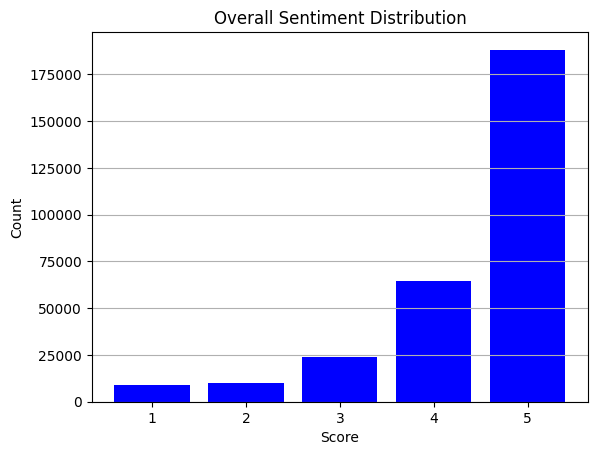


Total Votes: 296337

Percentage counts for each score:
Score 1: 3.05%
Score 2: 3.44%
Score 3: 8.12%
Score 4: 21.87%
Score 5: 63.51%


In [17]:
# Graphic representation of the distribution of scores

# Convert dictionary into dataframe
df_scores = pd.DataFrame(list(score_counts.items()), columns=['Score', 'Count'])

# Make bar graph
plt.bar(score_counts.keys(), score_counts.values(), color='blue')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(list(score_counts.keys()))  # Show all score labels
plt.grid(axis='y')
plt.show()

# Print total number of votes
totalVotes = sum(score_counts.values())
print(f'\nTotal Votes: {totalVotes}\n')

# Calculate percentage couts
percentage_counts = {k: round((v / totalVotes) * 100, 2) for k, v in score_counts.items()}

# Print the percentage counts
print('Percentage counts for each score:')
for score, percentage in percentage_counts.items():
    print(f'Score {score}: {percentage:.2f}%')



#### Unbalanced dataset

It is clear that the **dataset is unbalanced** as very high scores of 4 or 5 make up more than 85% of the set, while low scores of 1 or 2 only account for about 6.5% of the data. Hence **negative sentiment is represented by only 6.5% of the data**, for 93.5% of overall positive sentiment. This is something I will need to take into account when evaluating the final model, by **carefully studying micro and macro precision**.

**Micro precision** calculates precision globally by counting the total true positives, false positives, and false negatives across all classes before computing precision. This makes it more sensitive to the dominant classes.

**Macro precision** calculates precision for each class independently and then averages the precision scores for the different classes equally, regardless of the number of datapoints in each class. This can highlight performance disparities between classes.

### Scores, number of votes, and review date

The following code is to get the number of datapoints in the dataset as well as the range of values for the variables:
* 'overall' score
* number of votes the review has received
* review date


In [18]:
# Initialize lists
overall_list = []
votes_list = []
unixReviewTime_list = []

# Counter to count the number of entries
n = 0

# Iterate through each entry in the main dictionary and append values to each list
for review in data_dict.values():
    n += 1
    overall_list.append(review['overall'])
    votes_list.append(review['helpful'][1])
    unixReviewTime_list.append(review['unixReviewTime'])

# Call function summary_statistics() from utils.py
overall_stats = utils.summary_statistics(overall_list)
votes_stats = utils.summary_statistics(votes_list)
dates_stats = utils.summary_statistics(unixReviewTime_list)

# Print number of entries and statistics on 'overall' scores and number of votes
print(f"\nThere are {n} entries in this dataset, ranging from entry 0 to {n-1}\n")

# Print statistics in 3 aligned columns

# Create a single header for the columns
print(f" {'Overall Scores':>23}      {'Number of Votes':>23}      {'Review Dates':>23}")
print("  ","=" * 80)

# Print statistics in three aligned columns
for key in overall_stats.keys():
    overall_value = overall_stats.get(key, None)
    votes_value = votes_stats.get(key, None)
    dates_value = dates_stats.get(key, None)

    print(f"     {key:8}{overall_value:>10.2f} "
          f"           {key:8}{votes_value:>10.2f} "
          f"           {key:8}{utils.unixTime_to_humanTime(dates_value):>10}"
    )
print()



There are 296337 entries in this dataset, ranging from entry 0 to 296336

          Overall Scores              Number of Votes                 Review Dates
     mean          4.39            mean          2.23            mean    2013 03 24
     min           1.00            min           0.00            min     2002 03 07
     Q1            4.00            Q1            0.00            Q1      2012 11 25
     median        5.00            median        0.00            median  2013 06 17
     Q3            5.00            Q3            1.00            Q3      2014 01 06
     max           5.00            max        5819.00            max     2014 07 23



In [19]:
# Get and print summary statistics for:
# 'overall' scores, total number of votes ('helpful[1]'), and review dates

# initialize lists
overall_list = []
votes_list = []

# counter to count the number of entries
n = 0

# Iterate through each entry in main dictionary and append values to each list
for review in data_dict.values():
    n += 1
    overall_list.append(review['overall'])
    votes_list.append(review['helpful'][1])

# Call function summary_statistics() from utils.py
overall_stats = utils.summary_statistics(overall_list)
votes_stats = utils.summary_statistics(votes_list)
dates_stats = utils.summary_statistics(unixReviewTime_list)

# Print number of entries and statistics on 'overall' scores and number of votes
print(f"\nThere are {n} entries in this dataset, ranging from entry 0 to {n-1}")

print(f"\nStatistics on 'overall' Scores:")
print("\n".join(f"   {key:8} {value:10.2f}" for key, value in overall_stats.items()))

print(f"\nStatistics on Number of Votes:")
print("\n".join(f"   {key:8} {value:10.2f}" for key, value in votes_stats.items()))

print(f"\nStatistics on Dates of the reviews:")
print("\n".join(f"   {key:8} {utils.unixTime_to_humanTime(value):10}" for key, value in dates_stats.items()))



There are 296337 entries in this dataset, ranging from entry 0 to 296336

Statistics on 'overall' Scores:
   mean           4.39
   min            1.00
   Q1             4.00
   median         5.00
   Q3             5.00
   max            5.00

Statistics on Number of Votes:
   mean           2.23
   min            0.00
   Q1             0.00
   median         0.00
   Q3             1.00
   max         5819.00

Statistics on Dates of the reviews:
   mean     2013 03 24
   min      2002 03 07
   Q1       2012 11 25
   median   2013 06 17
   Q3       2014 01 06
   max      2014 07 23


I see from above that:
* 'overall' scores range from 1 to 5 stars
* the oldest review was written in 2002 (March 7) and the most recent one in 2014 (July 23).
* reviews have received between 0 and 5819 votes on whether they were helpful or not.

In [20]:
# Create list of tuples with these fields:
# overall score, helpful votes, nonhelpful votes, total votes, review age in days, review date)
result_list = []
tmax = utils.humanTime_to_unixTime('07 24, 2014')  # to calculate age (most recent review will be 1 day old)

for review in data_dict.values():
    overall = review['overall']
    helpful = review['helpful'][0]
    votes = review['helpful'][1]
    nonhelpful = votes - helpful
    unixReviewTime = review['unixReviewTime']

    # Calculate the age of the review in days
    reviewAge = (tmax - unixReviewTime) // (60*60*24)

    # Create the tuple and append it to the result list
    result_tuple = (overall, helpful, nonhelpful, votes, reviewAge, utils.unixTime_to_humanTime(unixReviewTime))
    result_list.append(result_tuple)

# Convert to a pandas dataframe for easier handling:
df_votes = pd.DataFrame(
    result_list,
    columns=['overall', 'helpfulVotes', 'nonHelpfulVotes','totalVotes', 'reviewAge', 'reviewDate']
    )


In [21]:
df_votes.head(3)

,overall,helpfulVotes,nonHelpfulVotes,totalVotes,reviewAge,reviewDate
0,5.0,0,0,0,179,2014 01 26
1,5.0,1,0,1,903,2012 02 02
2,4.0,2,0,2,877,2012 02 28


In [22]:
df_votes.describe()

,overall,helpfulVotes,nonHelpfulVotes,totalVotes,reviewAge
count,296337.000000,296337.000000,296337.000000,296337.000000,296337.000000
mean,4.393451,1.854844,0.378971,2.233815,486.425924
std,0.986905,19.885106,1.887270,20.798995,409.091571
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,0.000000,0.000000,0.000000,199.000000
50%,5.000000,0.000000,0.000000,0.000000,402.000000
75%,5.000000,1.000000,0.000000,1.000000,606.000000
max,5.000000,5696.000000,166.000000,5819.000000,4522.000000


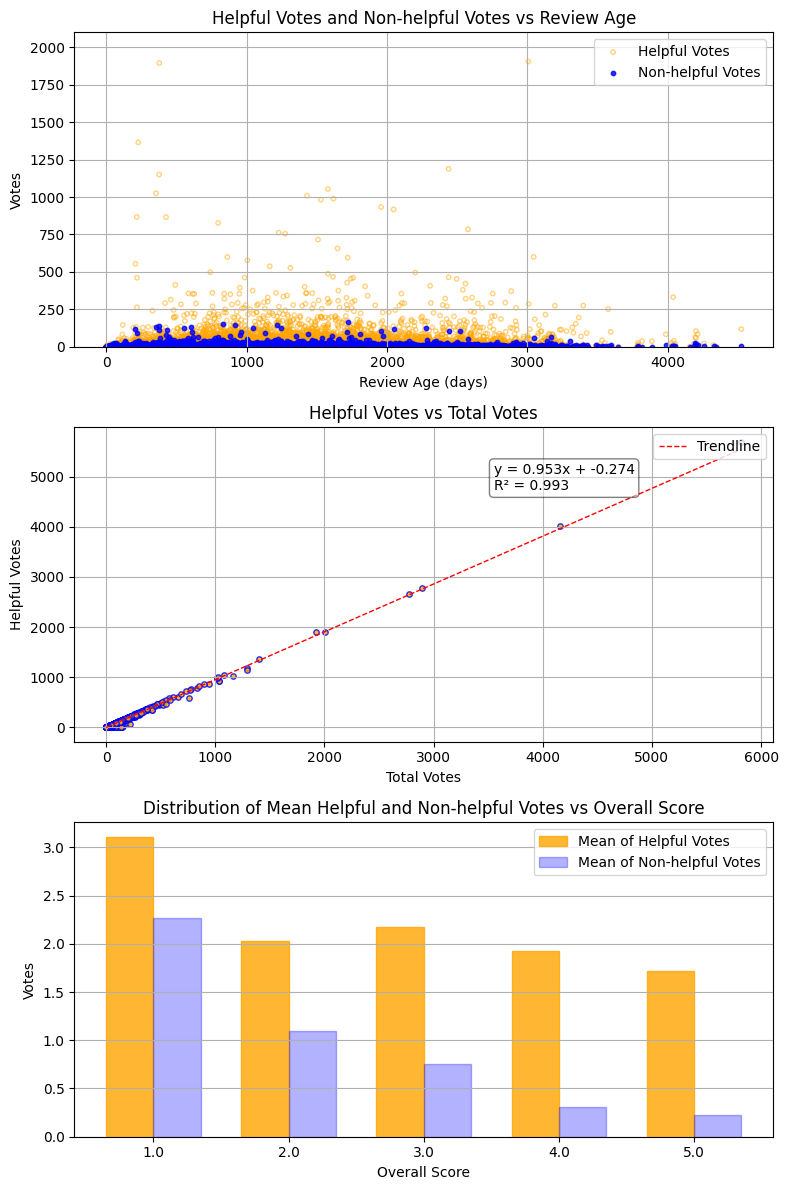

In [23]:
# Make scatter plots of:
# * Total Votes and Helpful Votes vs Review Age
# * Helpful Votes vs Total Votes

# Set up overall figure
plt.figure(figsize=(8, 12))

###############################################################
# Top graph: Helpful Votes and Non-helpful Votes vs Review Age
###############################################################
plt.subplot(3, 1, 1)

# Scatter plot for helpfulVotes
plt.scatter(df_votes['reviewAge'], df_votes['helpfulVotes'],
            edgecolor='orange', facecolors='none', label='Helpful Votes', s=10, alpha=0.5)

# Scatter plot for nonHelpfulVotes
plt.scatter(df_votes['reviewAge'], df_votes['nonHelpfulVotes'],
            color='blue', label='Non-helpful Votes', s=10, alpha=0.8)

# Set y-axis limit
plt.ylim(0, 2100)  # Set the maximum y-axis value

# Adding titles and labels
plt.title('Helpful Votes and Non-helpful Votes vs Review Age')
plt.xlabel('Review Age (days)')
plt.ylabel('Votes')
plt.legend(loc='upper right')
plt.grid(True)

#############################################
# Center graph: Helpful Votes vs Total Votes
#############################################
plt.subplot(3, 1, 2)

# Scatter plot
x = df_votes['totalVotes']
y = df_votes['helpfulVotes']
plt.scatter(x, y, color='orange', edgecolor='blue', alpha=0.8, s=15)

# Fit a linear trendline
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Generate points for the trendline
x_trend = np.linspace(min(x), max(x), 100)
y_trend = trendline(x_trend)

# Plot the trendline and add titles and labels
plt.plot(x_trend, y_trend, color='red', linestyle='--', linewidth=1, label='Trendline')
plt.title('Helpful Votes vs Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Helpful Votes')

# Calculate R^2
y_pred = trendline(x)
r_squared = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Display the trendline equation and R^2 value
plt.annotate(f'y = {coefficients[0]:.3f}x + {coefficients[1]:.3f}\nR² = {r_squared:.3f}',
             xy=(0.6, 0.8), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Adding titles and labels
plt.legend(loc='upper right')
plt.grid(True)


#####################################################################
# Bottom graph: Helpful votes and Non-helpful votes vs Overall score
#####################################################################
plt.subplot(3, 1, 3)

# Calculate the average helpful and non-helpful votes for each overall score
score_counts = df_votes['overall'].value_counts().sort_index()
helpful_means = df_votes.groupby('overall')['helpfulVotes'].mean()
non_helpful_means = df_votes.groupby('overall')['nonHelpfulVotes'].mean()

# Set the x values (overall scores) and the width of bars
x = helpful_means.index
bar_width = 0.35

# Bar positions for helpful and non-helpful votes
helpful_positions = range(len(x))
non_helpful_positions = [p + bar_width for p in helpful_positions]

# Create bar plots
plt.bar(helpful_positions, helpful_means, width=bar_width, edgecolor='orange', facecolor='orange', label='Mean of Helpful Votes', alpha=0.8)
plt.bar(non_helpful_positions, non_helpful_means, width=bar_width, edgecolor='blue', facecolor='blue', label='Mean of Non-helpful Votes', alpha=0.3)

# Adding titles and labels
plt.title('Distribution of Mean Helpful and Non-helpful Votes vs Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Votes')
plt.xticks([p + bar_width / 2 for p in helpful_positions], x)  # Set x-ticks to be in the middle of the grouped bars
plt.legend(loc='upper right')
plt.grid(axis='y')

###############################
# Adjust layout and show plot
###############################
plt.tight_layout()
plt.show()

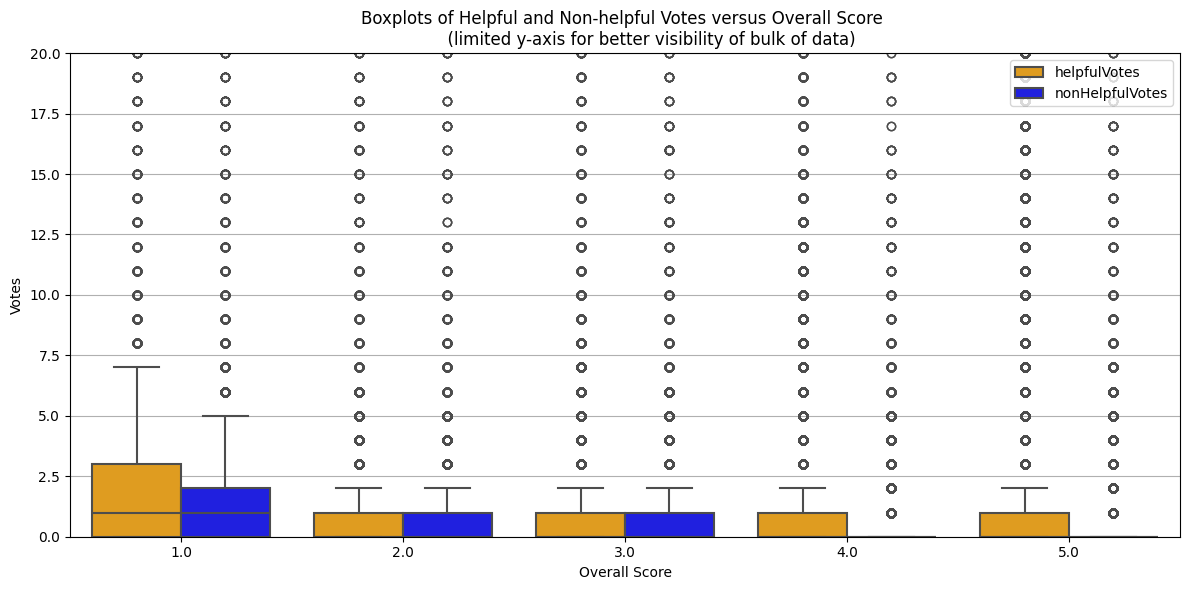

In [24]:
# Melt the DataFrame to long format for Seaborn
melted_df = df_votes.melt(id_vars='overall', value_vars=['helpfulVotes', 'nonHelpfulVotes'],
                           var_name='Vote Type', value_name='Votes')

# Define a maximum value on the y-axis for ease of comparison
ymax = 20

# Define a custom color palette
palette = {'helpfulVotes': 'orange', 'nonHelpfulVotes': 'blue'}

# Create a figure for boxplots
plt.figure(figsize=(12, 6))

# Create boxplots
sns.boxplot(x='overall', y='Votes', hue='Vote Type', data=melted_df, palette=palette, dodge=True, linewidth=1.5)

# Adding titles and labels
plt.title('Boxplots of Helpful and Non-helpful Votes versus Overall Score \n\
          (limited y-axis for better visibility of bulk of data)')
plt.xlabel('Overall Score')
plt.ylabel('Votes')
plt.ylim(0, ymax)  # Limit y-axis to ymax

# Adjust legend position
plt.legend(loc='upper right')

# Show grid and layout adjustments
plt.grid(axis='y')
plt.tight_layout()

plt.show()

From the investigations above, we notice the following:

* More than 50% of reviews have received zero votes on their helpfulness, and more than 75% have received no more than one vote.

* For overall scores of 4 or 5, "helpful" votes far outweigh "non-helpful" votes. However, for scores of 3 and below, the difference is not as significant. This could indicate that people who are happy with a product tend to make a greater effort to explain the reasons why, which makes this review more helpful.

* The scatter graph of "helpful" vs "total" votes shows a clear linear trend between these two variables, with a slope (gradient) of almost 1. This indicates that a review that receives many votes is generally associated with being helpful.

* While one may think that older reviews have a larger chance of having received many votes, the graph of "Helpful Votes and Non-helpful Votes vs Review Age" reveals that if enough days have passed (100 to 200 days) it doesn't really matter how long the review has been posted. This may be related to how algorithms choose to display the reviews for customers to see, with more recent reviews at the top.




### Conclusion of numeric fields exploration

The dataset is unbalanced, with overall positive sentiment (overall scores of 3 to 5) making up more than 93.5% of the set, while negative sentiment ('overall' scores of 1 or 2) only account for about 6.5% of the data.

There are reviews voted as "helpful" in all categories of 'overall' scores. These are likely to contain a larger bank of descriptive words, and hence should be taken into greater account when training the model. Perhaps a ratio of "helpful votes" to "non-helpful votes" (with an exception for zero values of votes) may be used as weightings to give more relevance to the more descriptive reviews during training of the model.

## Exploration of text fields

In [25]:
# Get and print summary statistics for the length of the fields:
# 'summary' and 'reviewText'

#initialize lists
summaryLength_list = []
reviewTextLength_list = []

# Iterate through each entry in main dictionary and append values to each list
for review in data_dict.values():
    summaryLength_list.append(len(review['summary']))
    reviewTextLength_list.append(len(review['reviewText']))


# Call function summary_statistics() from utils.py
summaryLength_stats = utils.summary_statistics(summaryLength_list)
reviewTextLength_stats = utils.summary_statistics(reviewTextLength_list)

# Print summary statistics
print(f"\nStatistics on 'summary' length (characters):")
print("\n".join(f"   {key:8} {value:10.2f}" for key, value in summaryLength_stats.items()))

print(f"\nStatistics on 'reviewText' length (characters):")
print("\n".join(f"   {key:8} {value:10.2f}" for key, value in reviewTextLength_stats.items()))



Statistics on 'summary' length (characters):
   mean          23.30
   min            1.00
   Q1            12.00
   median        19.00
   Q3            30.00
   max          173.00

Statistics on 'reviewText' length (characters):
   mean         464.82
   min            0.00
   Q1           162.00
   median       279.00
   Q3           530.00
   max        31296.00


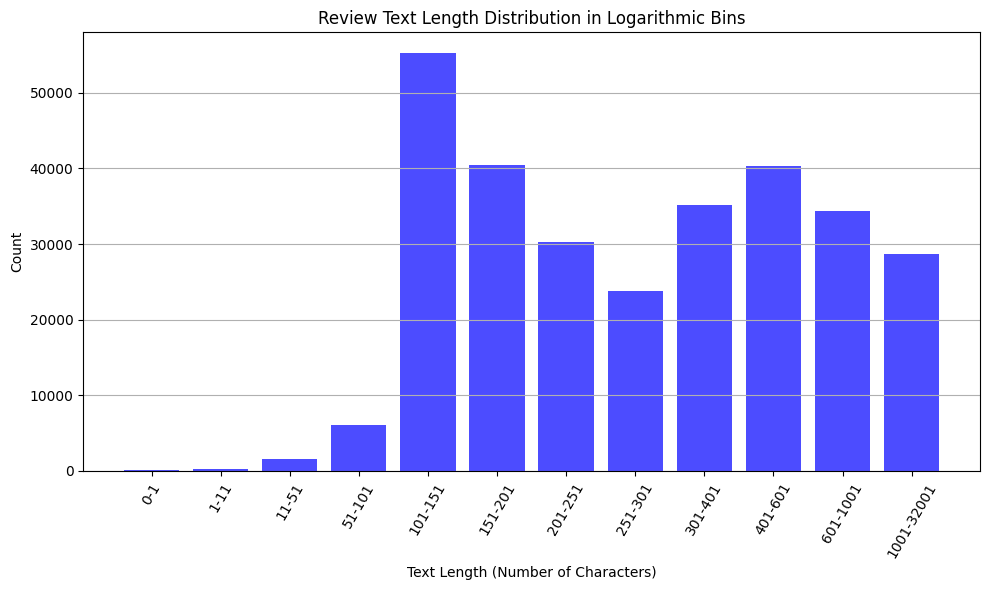

In [26]:
# Define the bins based on the specified ranges
bins = [0, 1, 11, 51, 101, 151, 201, 251, 301, 401, 601, 1001,32001]

# Use np.histogram to calculate the frequency of each bin
counts, _ = np.histogram(reviewTextLength_list, bins=bins)

# Create a bar plot of the counts
plt.figure(figsize=(10, 6))
plt.bar(range(len(counts)), counts, tick_label=[f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)], color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Review Text Length Distribution in Logarithmic Bins')
plt.xlabel('Text Length (Number of Characters)')
plt.xticks(rotation=60)
plt.ylabel('Count')

# Optional: Set y-axis to logarithmic scale for better visualization
#plt.yscale('log')

# Show grid and layout adjustments
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

### Create dataframe with relevant information

I will now create a dataframe containing this information:

* 'overall': overall sentiment (score from 1 to 5)
* 'helpful': number of "helpful" votes
* 'nonHelpful': number of "not helpful" votes
* 'votes': total number of votes
* 'negative': binary classification metric (1 = negative, 0 = positive)
* 'review': text of the review, limited at 600 characters (which will cover more than 75% of the data). Wherever the 'summary' text is longer than the 'reviewText' I will use 'summary' instead of 'reviewText' for the sentiment analysis.

In [27]:
# Retrieve all relevant data for the reviews and put in dataframe "df"

# Initialize lists
overallSentiment = []
helpfulVotes = []
nonHelpfulVotes = []
totalVotes = []
negativeSentiment = []
reviewsText = []

# Loop through all reviews
for review in data_dict.values():

    # Get overall sentiment, append it to list
    overall = review.get('overall')
    overallSentiment.append(overall)

    # Use utils.label_negative_sentiment to classify sentiment as
    # negative (1) or positive (0), and append to list
    negativeSentiment.append(utils.label_negative_sentiment(overall))

    # Get votes and append to lists of helpfulVotes, nonHelpfulVotes, and totalVotes
    helpful, votes = review.get('helpful',(0,0))
    nonHelpful = votes - helpful
    helpfulVotes.append(helpful)
    nonHelpfulVotes.append(nonHelpful)
    totalVotes.append(votes)

    # Get review text and summary text. If review text is longer than summary text,
    # keep review text (only first 600 characters). Otherwise keep summary text.
    reviewTextLength = len(review.get('reviewText'))
    summaryLength = len(review.get('summary'))

    if reviewTextLength >= summaryLength:
      reviewsText.append(review['reviewText'][:600])
    else:
      reviewsText.append(review.get('summary'))

df = pd.DataFrame({
    'overall': overallSentiment,
    'helpful': helpfulVotes,
    'nonHelpful': nonHelpfulVotes,
    'votes': totalVotes,
    'negative': negativeSentiment,
    'review': reviewsText
})

# Remove rows where 'review' has length < 3
df = df[df['review'].str.len() >= 3]  # Keep reviews with length >= 3

# Remove rows where 'review' or 'negative' is NaN
df = df.dropna(subset=['review', 'negative'])  # Drop rows with NaN in 'review' or 'negative'

# Resetting the index after filtering
df.reset_index(drop=True, inplace=True)

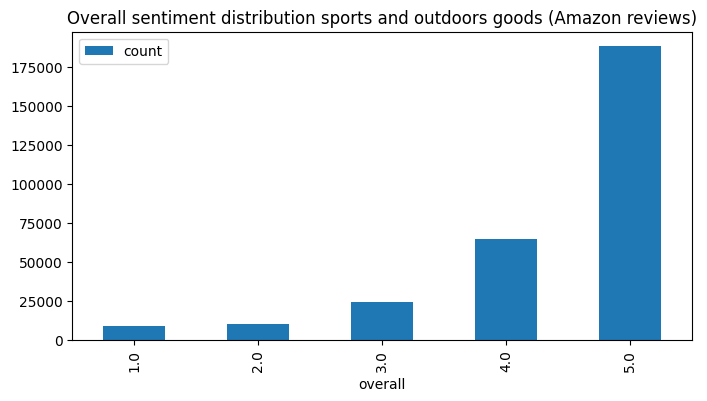

In [28]:
aux_df = pd.DataFrame(df['overall'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution sports and outdoors goods (Amazon reviews)', figsize=(8, 4))

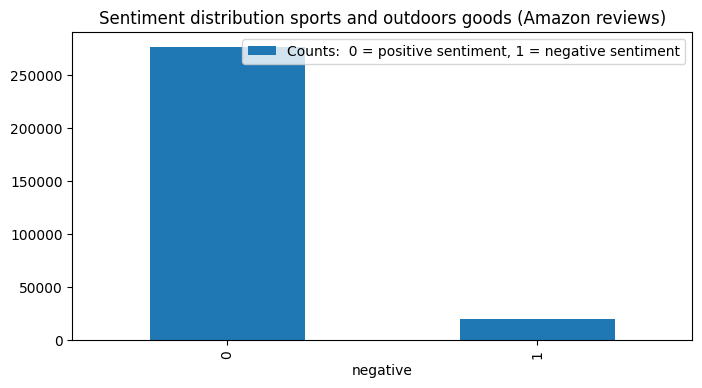

In [29]:
aux_df = pd.DataFrame(df['negative'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Sentiment distribution sports and outdoors goods (Amazon reviews)', figsize=(8, 4))
aux_df.legend(['Counts:  0 = positive sentiment, 1 = negative sentiment'])
plt.show()

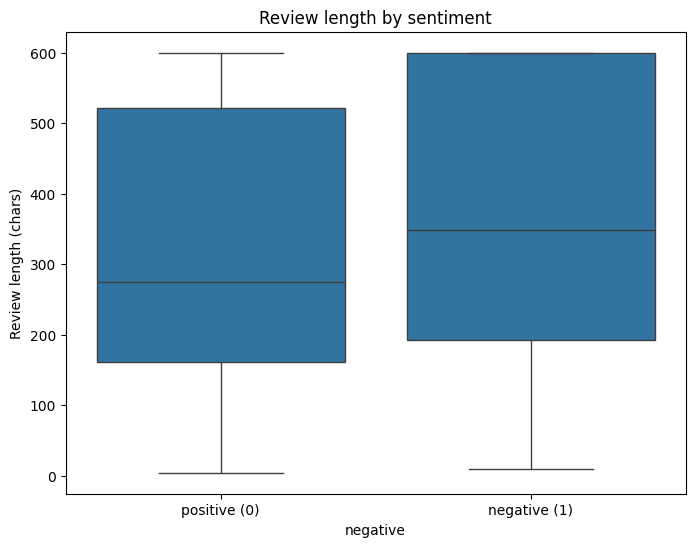

In [30]:
# Make boxplots of length of review when sentiment = 0 and sentiment = 1

# Add length column (characters)
df['review_len'] = df['review'].str.len()

# Prepare plot
plt.figure(figsize=(8,6))
sns.boxplot(x='negative', y='review_len', data=df)
plt.xticks([0,1], ['positive (0)', 'negative (1)'])
plt.ylabel('Review length (chars)')
plt.title('Review length by sentiment')
plt.show()


Because the longest review was very positive, I was assuming that the longer reviews were written by people who were happy about the product and that, overall, positive reviews would be longer.

So it is surprising to see that **negative reviews are generally longer than positive reviews**.

In [31]:
df.head(3)

,overall,helpful,nonHelpful,votes,negative,review,review_len
0,5.0,0,0,0,0,This came in on time and I am veru happy with ...,131
1,5.0,1,0,1,0,I had a factory Glock tool that I was using fo...,275
2,4.0,2,0,2,0,If you don't have a 3/32 punch or would like t...,234


In [32]:
df.describe()

,overall,helpful,nonHelpful,votes,negative,review_len
count,296337.000000,296337.000000,296337.000000,296337.000000,296337.000000,296337.000000
mean,4.393451,1.854844,0.378971,2.233815,0.064956,329.496148
std,0.986905,19.885106,1.887270,20.798995,0.246449,184.025997
min,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,162.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,279.000000
75%,5.000000,1.000000,0.000000,1.000000,0.000000,530.000000
max,5.000000,5696.000000,166.000000,5819.000000,1.000000,600.000000


In [33]:
# Get summary statistics of the length of the reviews in dataframe df

# Create a list of lengths of each 'review' string
reviewLengths = df['review'].str.len().tolist()

# Call utils.summary_statistics() to get the stats and print results
reviewLengths_stats = utils.summary_statistics(reviewLengths)

# Print summary statistics
print(f"\nStatistics on length of reviews in dataframe df (number of characters):")
print("\n".join(f"   {key:8} {value:10.2f}" for key, value in reviewLengths_stats.items()))



Statistics on length of reviews in dataframe df (number of characters):
   mean         329.50
   min            4.00
   Q1           162.00
   median       279.00
   Q3           530.00
   max          600.00


### A little tokenization playtime

In [34]:
reviews_by_sentences = df['review'].str.split('.')

In [35]:
# Print the first 3 reviews separated by sentences
for i in range(3):
    print(f"Review {i + 1}:")
    print(reviews_by_sentences[i])
    print()  # newline for better separation


Review 1:
['This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy']

Review 2:
['I had a factory Glock tool that I was using for my Glock 26, 27, and 17', "  I've since lost it and had needed another", "  Since I've used Ghost products prior, and know that they are reliable, I had decided to order this one", '  Sure enough, this is just as good as a factory tool', '']

Review 3:
["If you don't have a 3/32 punch or would like to have one in your Glock bag, this is okay", '  The butt end of it is handy for pushing pins back in place', "  If you already have a 3/32 punch and don't need another, don't both with this one", '']



In [36]:
reviews_by_words = df['review'].str.lower().str.split()

In [37]:
reviews_by_words.head()


,review
0,"[this, came, in, on, time, and, i, am, veru, h..."
1,"[i, had, a, factory, glock, tool, that, i, was..."
2,"[if, you, don't, have, a, 3/32, punch, or, wou..."
3,"[this, works, no, better, than, any, 3/32, pun..."
4,"[i, purchased, this, thinking, maybe, i, need,..."


In [38]:
# Flatten all words into a single Series of words, and reset the index.
words = reviews_by_words.apply(pd.Series).stack().reset_index(drop = True)

# Count the frequency of each unique word
vocabulary_ = Counter(words)

In [39]:
len(vocabulary_)

388485

The following code is to create a horizontal bar chart of the 20 most common words (for unfiltered reviews).

In [40]:
# Creates a list of the 20 most common words
vocabulary_most_common = vocabulary_.most_common(20)

In [41]:
words = [w[0] for w in vocabulary_most_common]
freqs = [w[1] for w in vocabulary_most_common]
freqs, words = zip(*sorted(zip(freqs, words)))

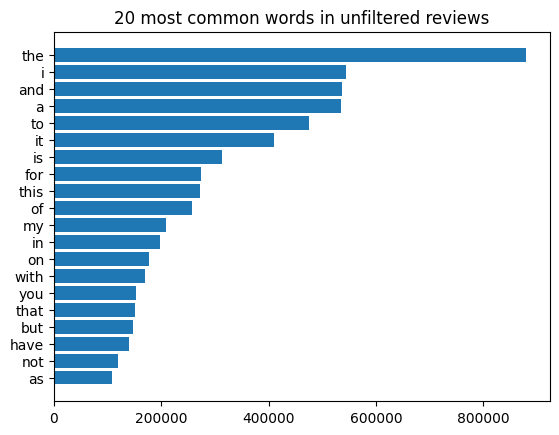

In [42]:
# Plot horizontal bar graph
plt.title("20 most common words in unfiltered reviews")
plt.barh(words, freqs)
plt.show()

In [43]:
vocabulary_most_common

[('the', 879772),
 ('i', 543597),
 ('and', 536380),
 ('a', 534487),
 ('to', 475547),
 ('it', 409277),
 ('is', 314047),
 ('for', 274346),
 ('this', 272990),
 ('of', 257543),
 ('my', 208398),
 ('in', 198419),
 ('on', 177861),
 ('with', 168915),
 ('you', 152922),
 ('that', 150419),
 ('but', 146720),
 ('have', 140301),
 ('not', 120395),
 ('as', 107458)]

In [44]:
list(vocabulary_.keys())[:30]

['this',
 'came',
 'in',
 'on',
 'time',
 'and',
 'i',
 'am',
 'veru',
 'happy',
 'with',
 'it,',
 'haved',
 'used',
 'it',
 'already',
 'makes',
 'taking',
 'out',
 'the',
 'pins',
 'my',
 'glock',
 '32',
 'very',
 'easy',
 'had',
 'a',
 'factory',
 'tool']

The list of vocabulary is extremely large and would be completely inefficient for classifying the text in negative vs positive sentiment.

Many of the 50 words displayed above are stop words or words that have a common meaning with a root word (such as: i've, have, haved, has). Further, some of the "words" have punctuation marks with them (counting as a different word), and we also have numbers written in numeric format.

The 20 most common words in the vocabulary are all stop words, with perhaps the word "not" as an exception since it could indicate negative or positive sentiment by negating a sentiment-rich word (i.e. "not good" or "not bad").

It is clear that I will need to conduct drastic lemmatization, removing of punctuation marks, and especially stop words.  

In [45]:
sw = get_stop_words(language = 'en')

# Remove specific words from the stop words list
words_to_remove = ["no", "not", "yes"]
sw = [word for word in sw if word not in words_to_remove]

# Function to split into words and remove stop words
def filter_words(review):
    # Use regex to remove punctuation, write in lowercase and split by words
    words = review.translate(str.maketrans('', '', string.punctuation)).lower().split()
    return [word for word in words if word not in sw]

# Apply the function to the 'review' column
df['filtered_reviews'] = df['review'].apply(filter_words)

# Combine all filtered words into a single list
all_filtered_words = [word for review in df['filtered_reviews'] for word in review]

# Use Counter to count frequency of each word
filtered_vocabulary_ = Counter(all_filtered_words)


In [46]:
len(filtered_vocabulary_)

230166

In [47]:
# Creates a list of the 20 most common words in the filtered reviews
filtered_vocabulary_most_common = filtered_vocabulary_.most_common(20)
filtered_vocabulary_most_common

[('not', 123894),
 ('no', 42749),
 ('knife', 41899),
 ('easy', 38251),
 ('fit', 37321),
 ('bought', 35972),
 ('price', 34920),
 ('product', 33890),
 ('nice', 32936),
 ('quality', 32021),
 ('time', 31140),
 ('light', 29742),
 ('bike', 27515),
 ('bag', 25638),
 ('size', 22548),
 ('recommend', 21296),
 ('fits', 20167),
 ('love', 19905),
 ('perfect', 19850),
 ('water', 19575)]

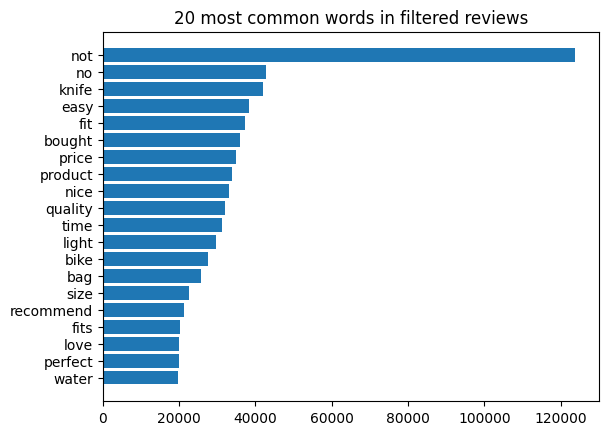

In [48]:
# Extract words and their frequency, and sort them
words = [w[0] for w in filtered_vocabulary_most_common]
freqs = [w[1] for w in filtered_vocabulary_most_common]
freqs, words = zip(*sorted(zip(freqs, words)))

# Plot a horizontal bar graph
plt.title("20 most common words in filtered reviews")
plt.barh(words, freqs)
plt.show()

What a difference! The only word that is common from the earlier list of most common words is "not", and it is followed by "no". These two words would normally be considered stop words if classifying the text by different types.

In this case, where we are analyzing sentiment, these words must stay present, as it is very different to read "recommend" or "not recommend".

By simply normalizing the text with using lowercase, removing punctuation marks and removing stop words, we have gone from a vocabulary list of 388485 to 230166 words. While this is a great achievement, it is still a very large vocabulary size and will need to be reduced using other strategies, such as stemming, lemmatization, n-gram modeling, word embedding, etc.

### N-grams: bigrams and trigrams

In [49]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [50]:
# Let's start by producing bigrams

# Flatten the list of filtered reviews
all_filtered_words = [word for review in df['filtered_reviews'] for word in review]

# Create bigrams from the flattened list of words
bigrams_ = list(ngrams(all_filtered_words, 2))

# OCalculate frequency distribution of bigrams
bigram_freq = FreqDist(bigrams_)


In [51]:
# Display the most common bigrams
most_common_bigrams = bigram_freq.most_common(10)
most_common_bigrams

[(('highly', 'recommend'), 4922),
 (('easy', 'install'), 4116),
 (('light', 'weight'), 3233),
 (('water', 'bottle'), 2799),
 (('red', 'dot'), 2671),
 (('not', 'fit'), 2649),
 (('5', 'stars'), 2545),
 (('heavy', 'duty'), 2476),
 (('not', 'bad'), 2125),
 (('fits', 'perfectly'), 1936)]

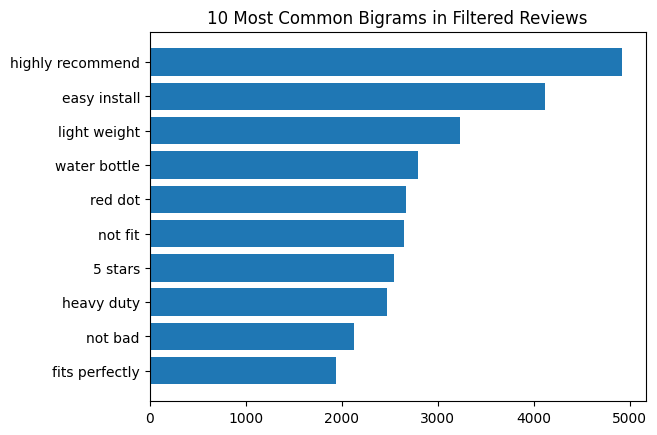

In [52]:
# Separate bigram pairs and their frequencies
bigrams, freqs = zip(*most_common_bigrams)

# Join bigrams tuples for better readability
bigrams = [' '.join(bigram) for bigram in bigrams]

# Sort frequencies and bigrams
freqs, bigrams = zip(*sorted(zip(freqs, bigrams)))

# Plot a horizontal bar graph
plt.title("10 Most Common Bigrams in Filtered Reviews")
plt.barh(bigrams, freqs)
plt.show()


In [53]:
# Let's go for the trigrams

# Create trigrams from the flattened list of words
trigrams_ = list(ngrams(all_filtered_words, 3))

# Calculate frequency distribution of trigrams
trigram_freq = FreqDist(trigrams_)

# Display the most common trigrams
most_common_trigrams = trigram_freq.most_common(10)
most_common_trigrams


[(('red', 'dot', 'sight'), 552),
 (('highly', 'recommend', 'product'), 519),
 (('reason', '4', 'stars'), 311),
 (('razor', 'sharp', 'box'), 275),
 (('swiss', 'army', 'knife'), 268),
 (('local', 'bike', 'shop'), 264),
 (('red', 'dot', 'scope'), 236),
 (('light', 'weight', 'easy'), 194),
 (('5', 'star', 'rating'), 187),
 (('4', 'stars', '5'), 187)]

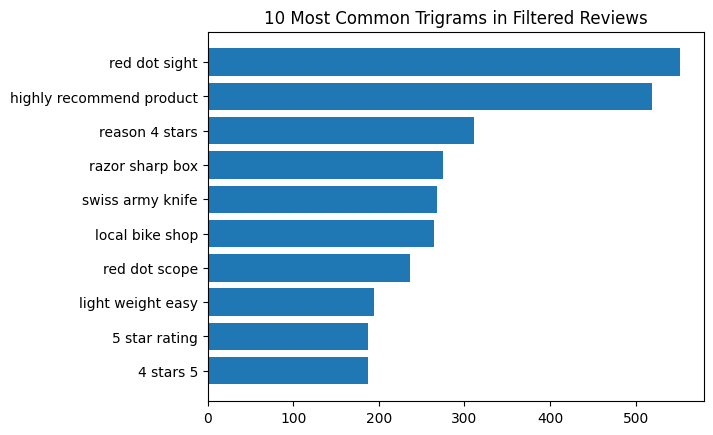

In [54]:
# Separate trigram pairs and their frequencies
trigrams, freqs = zip(*most_common_trigrams)

# Join trigrams tuples for better readability
trigrams = [' '.join(trigram) for trigram in trigrams]

# Sort frequencies and bigrams
freqs, trigrams = zip(*sorted(zip(freqs, trigrams)))

# Plot a horizontal bar graph
plt.title("10 Most Common Trigrams in Filtered Reviews")
plt.barh(trigrams, freqs)
plt.show()

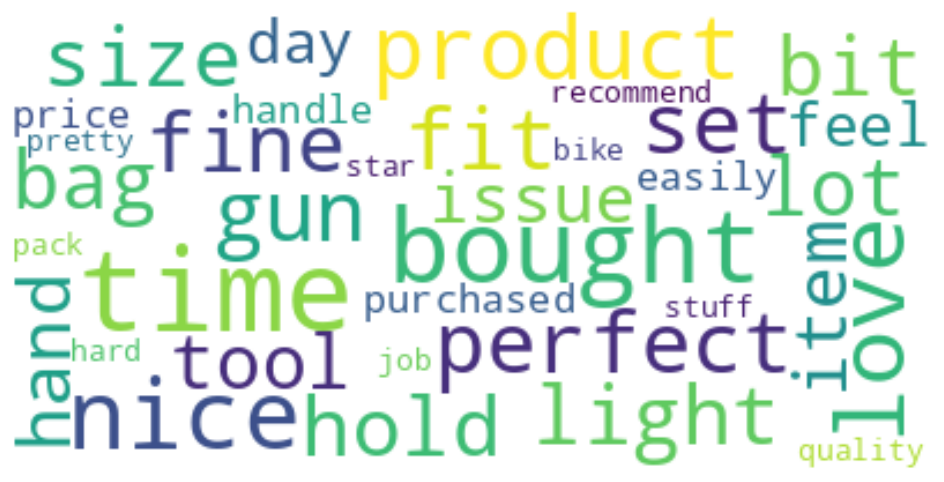

In [55]:
# This code is to create a Word Cloud

def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Concatenate list of words into a string and call the function
plot_word_cloud(' '.join(all_filtered_words))

In [56]:
nlp = spacy.load("en_core_web_sm")   # small model trained with webpages

def cleaning(review_spacy):
  # This function lemmatizes and removes stopwords
  # (review_spacy must be spaCy object)
  # txt = [token.lemma_ for token in doc if not token.is_stop]
  txt = [token.pos_ for token in doc]

  # Word2Vec uses the context words to learn to represent the vector for a word.
  # If a sentence only as one or two words, the benefit will be small.
  return ' '.join(txt)


In [57]:
type(df['filtered_reviews'].iloc[0])

list

In [58]:
cores = multiprocessing.cpu_count() # Contamos el número de cores en el ordenador
print(cores)

2


In [59]:
# Word2Vec expects a list of lists
sentences = df['filtered_reviews'].dropna().tolist()

# Prepare the model
w2v_model = Word2Vec(vector_size=100,  # each word represented as vector of 100 numbers
                     window=5,         # context window: up to 5 words before and after
                     min_count=10,     # ignore words that don't appear at least 10 times
                     workers=cores-1,  # as many workers as possible (safely)
                     alpha=0.03,       # starting learning rate (default Gensim is 0.025)
                     min_alpha=0.0003, # final learning rate (default Gensim is 0.0001)
                     sample=1e-4,      # undersampling frequent words to speed up training
                     sg=1,             # Skip-gram (better for semantics)  sg=0 -> CBOW (faster)
                     negative=10       # Better training stability
                    )

# Build vocabulary
w2v_model.build_vocab(sentences)



In [60]:
# Train the model
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=5)

(20153044, 31724945)

In [61]:
# Save the model
w2v_model.save("w2v_model.model")

In [62]:
# Choose some words that will be used for displaying embeddings
keys = ["light", "hard", "fine", "issue", "handle"]  # chosen from Word Cloud

# Initialize lists to store results
embedding_clusters = []  # for storing the embedding of the top 10 similar words for each key
word_clusters = []       # for storing actual 10 most similar words for each key

# Loop through each key word and find its top 10 most similar words
for word in keys:
    embeddings = []    # embeddings for current word
    words = []         # words for current word
    for similar_word, _ in w2v_model.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

print(word_clusters)

[['diffused', 'lightthis', 'blindingly', 'bright', 'lightthe', 'lightit', 'diffuse', 'lights', 'lightsthe', 'lighti'], ['difficult', 'hardi', 'sucky', 'outits', 'littl', 'it3', 'greatits', 'debatable', 'harder', 'carful'], ['not', 'contructed', 'wellcons', 'wellonly', 'shouldi', 'rea', 'durrable', 'larg', 'awesomeit', 'perfe'], ['issues', 'complaint', 'inconvenience', 'satisfactorily', 'deficiency', 'matter', 'stra', 'finagling', 'complaints', 'concern'], ['handles', 'skeletal', 'bidirectional', 'bade', 'fulltang', 'zytel', 'glassfilled', 'griphandle', 'gripy', 'handthe']]


In [63]:
# Display list of embeddings for 1st key
embedding_clusters[0]

[array([ 3.26139838e-01, -6.27598260e-04, -1.22166537e-01, -1.09155603e-01,
         2.55399466e-01, -1.08563796e-01, -3.85191143e-01,  1.67602137e-01,
        -3.14341416e-03,  5.39704412e-02,  1.17471404e-01, -4.20408845e-01,
         1.61304295e-01,  4.06767249e-01,  2.10598901e-01, -8.12473148e-02,
        -5.38222432e-01, -2.50915468e-01,  6.49563689e-03, -4.82140258e-02,
         2.05241010e-01,  9.53107420e-03,  1.51222542e-01,  1.18489273e-01,
         9.95806828e-02, -1.15290936e-02, -5.60266785e-02,  2.03131568e-02,
        -2.35148147e-02, -3.04650784e-01, -6.75170198e-02, -2.25046426e-01,
        -1.27923578e-01,  4.05277520e-01,  1.74539298e-01, -1.58752188e-01,
         2.10708663e-01, -2.64992267e-01,  2.84021199e-02, -3.03374678e-01,
         2.13628747e-02,  1.14252791e-02, -2.50636846e-01, -1.24794252e-01,
         7.71257728e-02,  3.06835324e-01, -2.32835233e-01,  2.48329371e-01,
        -7.68969655e-02,  5.72631538e-01, -3.15565228e-01, -1.36427850e-01,
        -3.9

In [64]:
# Reduce dimensionality to 2D using t-SNE (initialized with PCA)
tsne_model_2d = TSNE(perplexity=27, n_components=2, init='pca', n_iter=3500, random_state=32)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape  # n = number of keywords (here, 5)
                                    # m = number of words per keyword (here, 10)
                                    # k = embedding dimension or vector_size (here, 100)

In [65]:
# Displays (n, m, k): n = number of key words, m = top similar words per key, k = embedding dimension (vector_size)
embedding_clusters.shape

(5, 10, 100)

In [66]:
# Apply t-SNE to reduce the embedding vectors from k to 2 dimensions for plotting.
v_2d = tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [67]:
v_2d.shape

(50, 2)

In [68]:
# Apply t-SNE to reduce all word embeddings from k to 2 dimensions and store as a numpy array.
embeddings_2d=np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k)))
embeddings_2d.shape

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(50, 2)

In [69]:
embeddings_2d=embeddings_2d.reshape(n, m, 2)
embeddings_2d.shape

(5, 10, 2)

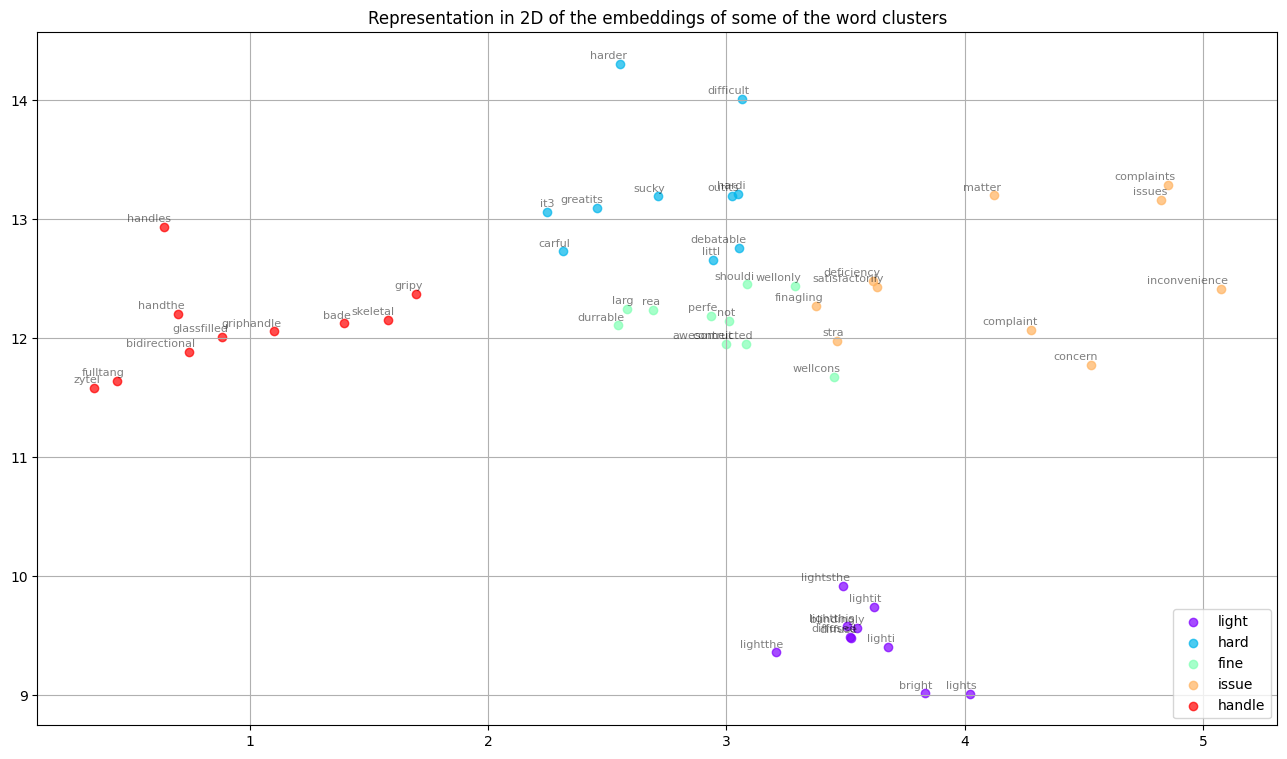

In [70]:
# Print word clusters on a 2d graph

%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representation in 2D of the embeddings of some of the word clusters')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

# Conclusions from Corpus Download and Exploration

In this first part, I explored with a good level of depth the entire dataset, a collection of almost 300000 entries of Amazon reviews on sports and outdoors items.

I explored tokenization by words and by sentences, converted text to lowercase, removed punctuation signs, and used a variety of visualization tools to display different aspects of the data. In the preprocessing pipeline,rather than doing it manually, I will be using spaCy for tokenization, lemmatization, POS tagging and also for handling stopwords. This will make the process more systematic and efficient.

I also used n-grams, which clearly show that certain combination of words are often found together and convey sentiment, while they do not necessarily when alone. Examples include the bigrams, "not good" or "5 stars". I will actually use this to mark specific combinations during preprocessing (negation marking and star-marking). I will also use bigrams in the vectorization stage, since many domain-specific words that alone would not help extract sentiment may do so when paired with a sentiment word. Examples include "good product", "terrible item" or "easy install".

Using Word2Vec to perform word embeddings, as visually shown on the 2-D representation of embeddings above, was a useful exploratory tool. The clusters that appear are quite clear, meaning the model is able to detect semantic similarity based on context. However, in the final model I will be using a Bag-of-Words representation with TF-IDF weighting, since this is more in line with the project requirements. The Word2Vec visualization also highlights the need for proper preprocessing, as several words in the "light" cluster seem to be tokenization artifacts or spelling issues (such as "lightthe" or "lightit"). This also reinforces my decision to use consistent tokenization and cleaning with spaCy.

When exploring the field 'helpful', which is a list of two numbers [number of "helpful" votes, total number of votes], I noticed that while many reviews only have a few votes (or none) on their helpfulness, some have received a substantial number of votes. I initially considered using these reviews to give more importance to potentially higher-quality content. But after further reflection, I realized that reviews marked as helpful may simply contain more detailed or domain-specific vocabulary, which does not necessarily improve sentiment detection. Hence, I will not be including this field in the model I will be implementing. If time allows, I may experiment with a version of the model that incorporates weights derived from this metric to evaluate whether it improves performance.

However, an aspect that did show a meaningful difference is review length. Negative reviews tend to be longer, as observed in the boxplots review length by sentiment class. I will therefore compute review length (number of tokens), standardize it, and append it as an additional feature after TF-IDF vectorization. If this correlation is indeed meaninful, the model will learn to use it, potentially improving performance on the minority (negative sentiment) class.  

Finally, I also clearly explained that the dataset is unbalanced. I will handle this imbalance during model training by using class weighting and, if necessary, oversampling techniques. Finally, when evaluating the model, I will report and discuss precision, recall and F1 score, considering both micro and macro averaging, with particular attention to the minority class (negative sentiment).